In [22]:
import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib 


from astropy.table import Table
from astropy.io import fits
import h5py
from Payne.fitting.genmod import GenMod

import os
import csv

In [101]:
def gensynthspec(specNN='', NNtype='', starpars=([]), plot=False):
    # Read in model spectrum parameters
    # model_filename = os.path.expanduser(model_filename)
    # data, header = fits.getdata(model_filename, header=True)

    # define desired parameters
    if starpars:
        print(f"Spectral parameters:\n[Teff, log(g), [Fe/H], [a/Fe], vrad, vstar, vmic, lsf (R), pc0, pc1, pc2, pc3]\n{starpars}")
    else:
        starpars = ([
                1, # Teff
                1, # log(g)
                1, # [Fe/H]
                1, # [a/Fe]
                1, # vrad
                1, # vstar
                1, # vmic
                1, # lsf (R)
                1, # pc0
                1, # pc1
                1, # pc2
                1, # pc3
        ])
        print(f"Spectral parameters:\n[Teff, log(g), [Fe/H], [a/Fe], vrad, vstar, vmic, lsf (R), pc0, pc1, pc2, pc3]\n{starpars}")
    Teff = starpars[0]
    logg = starpars[1]
    rv = starpars[4]

    # read in observed wavelengths from one of our Hectochelle stars
    obs_wave = np.array(Table.read('synth/obs_wave.csv')['wave'])

    # initialize model generation class
    GM = GenMod()
    GM._initspecnn(
        nnpath=specNN,
        NNtype=NNtype)
    
    # generate the model, output is an array of [wave,flux]
    specmod = GM.genspec(starpars, outwave=obs_wave, modpoly=True)
    
    print('Any nans?')
    if np.any(specmod[1]==np.nan):
        print('Yes')
        print(np.where(specmod[1]==np.nan))
    else:
        print('No')

    flux = specmod[1]


    # plot the synthetic spectrum
    fig, ax = plt.subplots(figsize=(10,2.5))
    # matplotlib.rc('xtick', labelsize=28)
    font = {'size': 22}
    matplotlib.rc('font', **font)
    matplotlib.rcdefaults()
    # matplotlib.rc('xlabel', labelsize=28)
    # matplotlib.rc('ytick', labelsize=28)
    

    if plot:
        # plot the model
        ax.plot(specmod[0], specmod[1], lw=1.25, c='k', zorder=0, label='WITHOUT noise')
        ax.set_title(f'T={Teff}, logg={logg}', pad=50)

        ax.set_yticks([0.4, 0.6, 0.8, 1.0])
        ax.tick_params(labelleft=False, labelsize=16, labelbottom=False)
        ax.set_xlim(5160, 5190)

        # ax.set_xlabel(r"Wavelength ($\AA$)", fontsize=16)
        # ax.set_ylabel("Brightness\n(arbitrary units)", fontsize=16)
    
        plt.savefig(f"synth_spec_T{int(Teff)}_g{int(logg)}.png", dpi=500, bbox_inches='tight')
        plt.show()

Spectral parameters:
[Teff, log(g), [Fe/H], [a/Fe], vrad, vstar, vmic, lsf (R), pc0, pc1, pc2, pc3]
[9500, 3.0, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0]
Any nans?
No


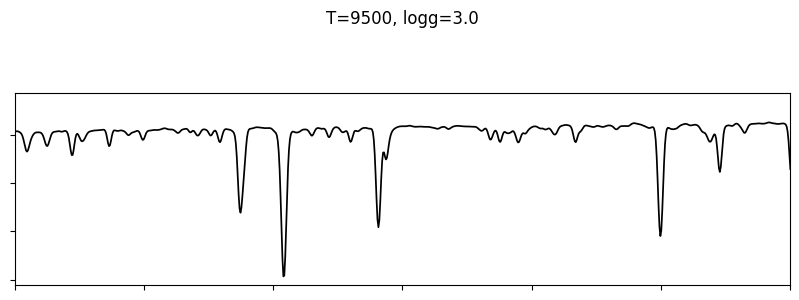

In [104]:
## specNN='/data/labs/douglaslab/sofairj/demo_binary/models/specNN/modV0_spec_LinNet_R42K_WL510_535_wvt.h5'
NNtype='LinNet'

starpars1 = [7500, 3.0, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0,]
starpars2 = [7500, 4.5, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0,]

starpars3 = [8500, 3.0, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0,]
starpars4 = [8500, 4.5, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0,]

starpars5 = [9500, 3.0, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0,]
starpars6 = [9500, 4.5, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0,]


starpars = (starpars1,starpars2,starpars3,starpars4,starpars5,starpars6)
gensynthspec(specNN=specNN, NNtype=NNtype, starpars=starpars5, plot=True)

# for pars in starpars:
#     # print(pars)
#     gensynthspec(specNN=specNN, NNtype=NNtype, starpars=pars, plot=True)

Spectral parameters:
[Teff, log(g), [Fe/H], [a/Fe], vrad, vstar, vmic, lsf (R), pc0, pc1, pc2, pc3]
[8500, 4.5, -0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0]
Any nans?
No


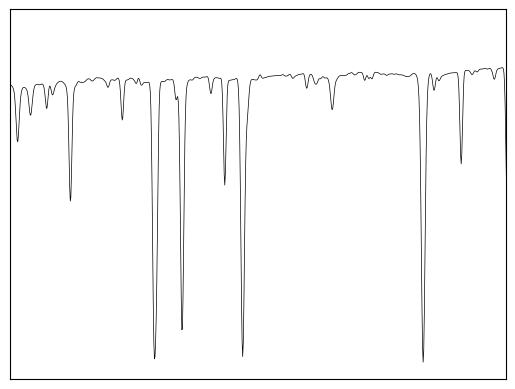

<Figure size 640x480 with 0 Axes>

In [48]:
specNN='/data/labs/douglaslab/sofairj/demo_binary/models/specNN/modV0_spec_LinNet_R42K_WL510_535_wvt.h5'
NNtype='LinNet'

starpars = ([
            8500, # Teff
            4.5, # log(g)
            -0.12, # [Fe/H]
            0.11, # [a/Fe]
            -3.162806696, # vrad
            2.74, # vstar
            1.0, # vmic
            32007.42, # lsf (R)
            1.08, # pc0
            0.06, # pc1
            0.0, # pc2
            0.0, # pc3
    ])

gensynthspec(specNN=specNN, NNtype=NNtype, starpars=starpars, plot=True)

Spectral parameters:
[Teff, log(g), [Fe/H], [a/Fe], vrad, vstar, vmic, lsf (R), pc0, pc1, pc2, pc3]
[7500, 4.5, -0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0]
Any nans?
No


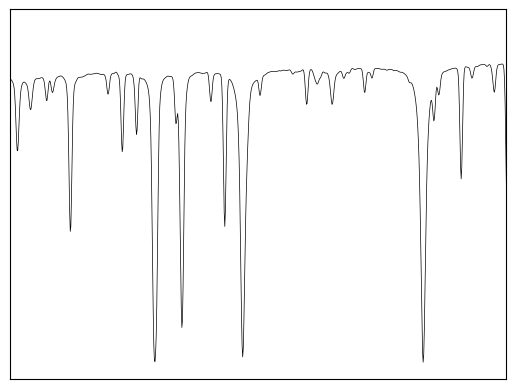

<Figure size 640x480 with 0 Axes>

In [49]:
specNN='/data/labs/douglaslab/sofairj/demo_binary/models/specNN/modV0_spec_LinNet_R42K_WL510_535_wvt.h5'
NNtype='LinNet'

starpars = ([
            7500, # Teff
            4.5, # log(g)
            -0.12, # [Fe/H]
            0.11, # [a/Fe]
            -3.162806696, # vrad
            2.74, # vstar
            1.0, # vmic
            32007.42, # lsf (R)
            1.08, # pc0
            0.06, # pc1
            0.0, # pc2
            0.0, # pc3
    ])

gensynthspec(specNN=specNN, NNtype=NNtype, starpars=starpars, plot=True)

In [18]:
starpars1 = [7500, 3.0, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0,]
starpars2 = [7500, 4.5, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0,]

starpars3 = [8500, 3.0, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0,]
starpars4 = [8500, 4.5, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0,]

starpars5 = [9500, 3.0, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0,]
starpars6 = [9500, 4.5, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0,]

starpars = (starpars1,starpars2,starpars3,starpars4,starpars5,starpars6)

for params in starpars:
    print(params)

[7500, 3.0, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0]
[7500, 4.5, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0]
[8500, 3.0, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0]
[8500, 4.5, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0]
[9500, 3.0, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0]
[9500, 4.5, 0.12, 0.11, -3.162806696, 2.74, 1.0, 32007.42, 1.08, 0.06, 0.0, 0.0]


In [20]:
def gensynthspec_multiplot(specNN='', NNtype='', starpars=([]), plot=False):

    # Read in model spectrum parameters
    # model_filename = os.path.expanduser(model_filename)
    # data, header = fits.getdata(model_filename, header=True)

    # define desired parameters
    if starpars:
        print(f"Spectral parameters:\n[Teff, log(g), [Fe/H], [a/Fe], vrad, vstar, vmic, lsf (R), pc0, pc1, pc2, pc3]\n{starpars[0]}")
    else:
        starpars = ([
                1, # Teff
                1, # log(g)
                1, # [Fe/H]
                1, # [a/Fe]
                1, # vrad
                1, # vstar
                1, # vmic
                1, # lsf (R)
                1, # pc0
                1, # pc1
                1, # pc2
                1, # pc3
        ])
        print(f"Spectral parameters:\n[Teff, log(g), [Fe/H], [a/Fe], vrad, vstar, vmic, lsf (R), pc0, pc1, pc2, pc3]\n{starpars[0]}")
    # Teff = starpars[0]
    # logg = starpars[1]
    # rv = starpars[4]

    # read in observed wavelengths from one of our Hectochelle stars
    obs_wave = np.array(Table.read('synth/obs_wave.csv')['wave'])

    fig, axs = plt.subplots(nrows=3, ncols=2, layout='constrained')

    for params in starpars:
        # initialize model generation class
        GM = GenMod()
        GM._initspecnn(
            nnpath=specNN,
            NNtype=NNtype)
        
        # generate the model, output is an array of [wave,flux]
        specmod = GM.genspec(starpars, outwave=obs_wave, modpoly=True)
        
        print('Any nans?')
        if np.any(specmod[1]==np.nan):
            print('Yes')
            print(np.where(specmod[1]==np.nan))
        else:
            print('No')
    
        flux = specmod[1]

    # plot the synthetic spectrum
    fig, ax = plt.subplots()

    if plot:
        # plot the model
        for ax in axs.flat:
            example_plot(ax)
            ax.plot(specmod[0], specmod[1], lw=1, c='k', zorder=0, label=f'{}{}')

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(5160, 5190)
    
        # plt.savefig(f"synth_spec_T{int(Teff)}_g{int(logg)}.png", dpi=500)
        # plt.show()

SyntaxError: f-string: empty expression not allowed (2276713232.py, line 61)